In [6]:
import pandas as pd

import pygbif
pygbif.caching(True, name='pygbif_cache')

INFO:Removing expired responses.


{'cache': True,
 'name': 'pygbif_requests_cache',
 'backend': 'sqlite',
 'expire_after': 86400,
 'allowable_codes': (200,),
 'allowable_methods': ('GET',)}

In [7]:
# Keys could be obtained through queries,
# species.name_suggest('Fungi')[0]['key']]  # <-- not tested
# registry.dataset_suggest('iNaturalist Research-grade Observations')[0]['key']  # <-- not tested
# but easier to just keep a copy hard-coded

# GBIF dataset key for the "iNaturalist Research-grade Observations"
inat_dataset_key = '50c9509d-22c7-4a22-a47d-8c48425ef4a7'
# Taxon Key for the Kingdom "Fungi"
fungi_taxon_key = '5'

In [19]:
occ = pygbif.occurrences.search(
    datasetKey = inat_dataset_key,
    taxonKey = fungi_taxon_key,
    mediatype = 'StillImage',
)

In [20]:
occ.keys()

dict_keys(['offset', 'limit', 'endOfRecords', 'count', 'results', 'facets'])

In [22]:
print(occ['offset'])
print(occ['limit'])
print(occ['endOfRecords'])
print(occ['count'])

0
300
False
1387575


In [24]:
# how do we get the next pages? offset?
occ = pygbif.occurrences.search(
    datasetKey = inat_dataset_key,
    taxonKey = fungi_taxon_key,
    mediatype = 'StillImage',
    offset=300,
)
print(occ['offset'])
print(occ['limit'])
print(occ['endOfRecords'])
print(occ['count'])

300
300
False
1387575


In [25]:
# What does it return in results?
occ['results'][0]

{'key': 3455588868,
 'datasetKey': '50c9509d-22c7-4a22-a47d-8c48425ef4a7',
 'publishingOrgKey': '28eb1a3f-1c15-4a95-931a-4af90ecb574d',
 'installationKey': '997448a8-f762-11e1-a439-00145eb45e9a',
 'publishingCountry': 'US',
 'protocol': 'DWC_ARCHIVE',
 'lastCrawled': '2022-11-17T12:13:40.744+00:00',
 'lastParsed': '2022-11-25T06:08:50.064+00:00',
 'crawlId': 325,
 'hostingOrganizationKey': '28eb1a3f-1c15-4a95-931a-4af90ecb574d',
 'extensions': {'http://rs.gbif.org/terms/1.0/Multimedia': [{'http://purl.org/dc/terms/license': 'http://creativecommons.org/licenses/by-nc/4.0/',
    'http://purl.org/dc/terms/references': 'https://www.inaturalist.org/photos/174569361',
    'http://purl.org/dc/terms/rightsHolder': 'Mary Kilgore',
    'http://rs.tdwg.org/dwc/terms/catalogNumber': '174569361',
    'http://purl.org/dc/terms/created': '2022-01-02T17:34:48Z',
    'http://purl.org/dc/terms/publisher': 'iNaturalist',
    'http://purl.org/dc/terms/type': 'StillImage',
    'http://purl.org/dc/terms/cre

What are facets?

In [27]:
occ['facets']

[]

looking at documentation, they're a way of returning aggregate information...? Cool!

In [28]:
occ = pygbif.occurrences.search(
    datasetKey = inat_dataset_key,
    taxonKey = fungi_taxon_key,
    mediatype = 'StillImage',
    limit = 0,
    facet = [
        "country",
        "basisOfRecord"
    ]
)
occ['facets']

[{'field': 'BASIS_OF_RECORD',
  'counts': [{'name': 'HUMAN_OBSERVATION', 'count': 1387575}]},
 {'field': 'COUNTRY',
  'counts': [{'name': 'US', 'count': 683734},
   {'name': 'CA', 'count': 131228},
   {'name': 'RU', 'count': 84752},
   {'name': 'AU', 'count': 72765},
   {'name': 'GB', 'count': 61197},
   {'name': 'NZ', 'count': 50035},
   {'name': 'DE', 'count': 39225},
   {'name': 'FI', 'count': 26344},
   {'name': 'MX', 'count': 21245},
   {'name': 'LT', 'count': 18624}]}]

Let's try to get a histogram of observations per month

In [30]:
# First, lets bundle our parameters if we're going to be making
# the same query multiple times
params = {
    'datasetKey': inat_dataset_key,
    'taxonKey': fungi_taxon_key,
    'mediatype': 'StillImage',
}

In [32]:
# Now lets get a facet of observation counts per month
#  - All without even using Pandas or DataFrames!
occ = pygbif.occurrences.search(
    **params,
    limit = 0,
    facet = "month",
)
occ['facets']

[{'field': 'MONTH',
  'counts': [{'name': '10', 'count': 214991},
   {'name': '9', 'count': 178945},
   {'name': '8', 'count': 148362},
   {'name': '5', 'count': 123082},
   {'name': '7', 'count': 120348},
   {'name': '11', 'count': 109994},
   {'name': '6', 'count': 106171},
   {'name': '4', 'count': 100350},
   {'name': '1', 'count': 80171},
   {'name': '12', 'count': 77229}]}]

Wait! We're missing months 2 and 3 (Febrary and March).
Looking back at the documentation, it seems that facets are paged similar to observations.

In [47]:
occ = pygbif.occurrences.search(
    **params,
    limit = 0,
    facet = "month",
    # month_facetOffset = 10, # We could use multiple queries but
    # in this case it is easier to just expand the facetLimit
    month_facetLimit = 12, # it defaulted to 10
)
occ['facets']

[{'field': 'MONTH',
  'counts': [{'name': '10', 'count': 214991},
   {'name': '9', 'count': 178945},
   {'name': '8', 'count': 148362},
   {'name': '5', 'count': 123082},
   {'name': '7', 'count': 120348},
   {'name': '11', 'count': 109994},
   {'name': '6', 'count': 106171},
   {'name': '4', 'count': 100350},
   {'name': '1', 'count': 80171},
   {'name': '12', 'count': 77229},
   {'name': '3', 'count': 70273},
   {'name': '2', 'count': 57659}]}]

There they are!

Let's load that baby into a dataframe!

In [49]:
df = pd.DataFrame(occ['facets'][0]['counts'])

In [50]:
# convert to month names
df['month_name'] = pd.to_datetime(
    '2010-' + df['name'].astype(int).astype(str) + '-1',
    format = '%Y-%m'
).dt.month_name()
df

,name,count,month_name
0,10,214991,October
1,9,178945,September
2,8,148362,August
3,5,123082,May
4,7,120348,July
5,11,109994,November
6,6,106171,June
7,4,100350,April
8,1,80171,January
9,12,77229,December


In [53]:
# sort by month number first
# need to convert column to month first
df['name'] = df['name'].astype(int)
df = df.sort_values( by='name' )
df

,name,count,month_name
8,1,80171,January
11,2,57659,February
10,3,70273,March
7,4,100350,April
3,5,123082,May
6,6,106171,June
4,7,120348,July
2,8,148362,August
1,9,178945,September
0,10,214991,October


<AxesSubplot: title={'center': 'Fungi Observations per Month'}, xlabel='Month'>

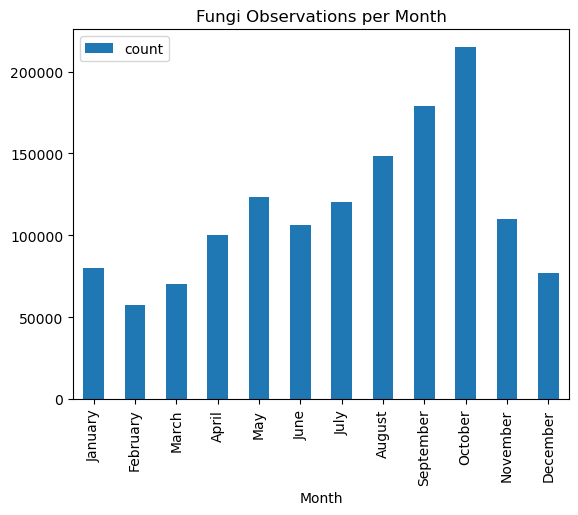

In [55]:
df.plot(
    title = 'Fungi Observations per Month',
    kind = 'bar',
    x = 'month_name',
    y = 'count',
    xlabel = 'Month',
)

We can theorize that April showers bring May mushrooms and further rains during the summer months (or possibly the more temparate weather) is a signal to the fungi to produce fruiting bodies (mushrooms).

Though, we should be aware that these observations are distributed across the globe (we should get a better idea of the distribution via a map) and summer months in one part of the world are completely different than in other parts. Also, contibutor numbers and therefore observation count could vary significantly from country to country.

Let's see what the geographical distribution is like with the [maps](https://pygbif.readthedocs.io/en/latest/modules/maps.html) module/endpoint!

/home/charlescoult/.cache/python/pygbif/eefe0caa44d7a9d962b8337250c6d748f3b1a5530428bf6063fb6064925e55de.png
AxesImage(size=(512, 512))


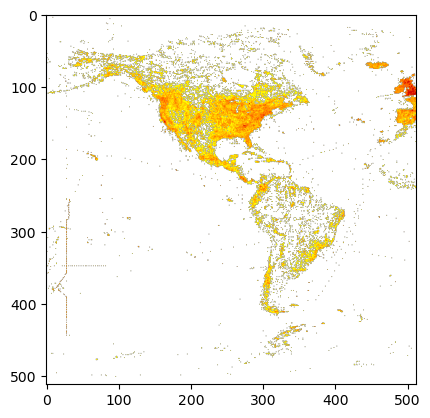

In [61]:
out = pygbif.maps.map(
    source = 'density',
    taxonKey = fungi_taxon_key,
    # adding this property yields a 503 - service unavailable error?
    #datasetKey = inat_dataset_key,
)
print( out.path )
print( out.img )

It looks like there are limitations to the 'map' API endpoint.

Alas, while looking up API limits I came across this (from the [API documentation](https://www.gbif.org/developer/occurrence#:~:text=In%20order%20to%20retrieve%20all,any%20query%20of%20100%2C000%20records.)):
> In order to retrieve all results for a given search filter you need to issue individual requests for each page, which is limited to a maximum size of 300 records per page. Note that for technical reasons we also have a hard limit for any query of 100,000 records. You will get an error if the offset + limit exceeds 100,000. To retrieve all records beyond 100,000 you should use our [asynchronous download service](https://www.gbif.org/developer/occurrence#download) instead.

All Fungi Observations with images equates to 1.3 million records, which means I'll have to do an asynchronous download use a straight dataframe instead of this library...